In [7]:
import sys
import os
sys.path.insert(0, os.getcwd()+'/src/')
sys.path.insert(0, '/home/mcarenso/code/stage-2023-multiscale-extremes/scripts/src/')
from myImports import *
%matplotlib inline
%load_ext autoreload

output_SAM = pickle.load(open("/homedata/mcarenso/Stage2023/SAM/300K/AgeAnalysis.pkl", "rb"))
output_ICON = pickle.load(open("/homedata/mcarenso/Stage2023/ICON/300K/AgeAnalysis.pkl", "rb"))
output_MESONH = pickle.load(open("/homedata/mcarenso/Stage2023/MESONH/300K/AgeAnalysis.pkl", "rb"))
outputs = [output_SAM, output_ICON, output_MESONH]
#Ages_over_bins, Ages_of_Xprecip, Xprecip_over_ages, Xprecip_counts, Ages_per_duration in each output

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


FileNotFoundError: [Errno 2] No such file or directory: '/homedata/mcarenso/Stage2023/ICON/300K/AgeAnalysis.pkl'

In [3]:
figures_SAM_path = "/homedata/mcarenso/Stage2023/SAM/300K/Figures/"
figures_ICON_path = "/homedata/mcarenso/Stage2023/ICON/300K/Figures/"
figures_MESONH_path = "/homedata/mcarenso/Stage2023/MESONH/300K/Figures/"
figures_path = [figures_SAM_path, figures_ICON_path, figures_MESONH_path]   
figures_All_path = "/homedata/mcarenso/Stage2023/Figures/"
sim_names = ["SAM", "ICON", "MESONH"]

In [4]:
distrib_SAM_path = "/homedata/mcarenso/Stage2023/SAM/300K/Distribution_Precip_5decades.pkl"
distrib_ICON_path = "/homedata/mcarenso/Stage2023/ICON/300K/Distribution_Precip_5decades.pkl"
distrib_MESONH_path = "/homedata/mcarenso/Stage2023/MESONH/300K/Distribution_Precip_5decades.pkl"

distrib_MESONH = pickle.load(open(distrib_MESONH_path, "rb"))
distrib_ICON = pickle.load(open(distrib_ICON_path, "rb"))
distrib_SAM = pickle.load(open(distrib_SAM_path, "rb"))

distribs = [distrib_SAM, distrib_ICON, distrib_MESONH]

NameError: name 'outputs' is not defined

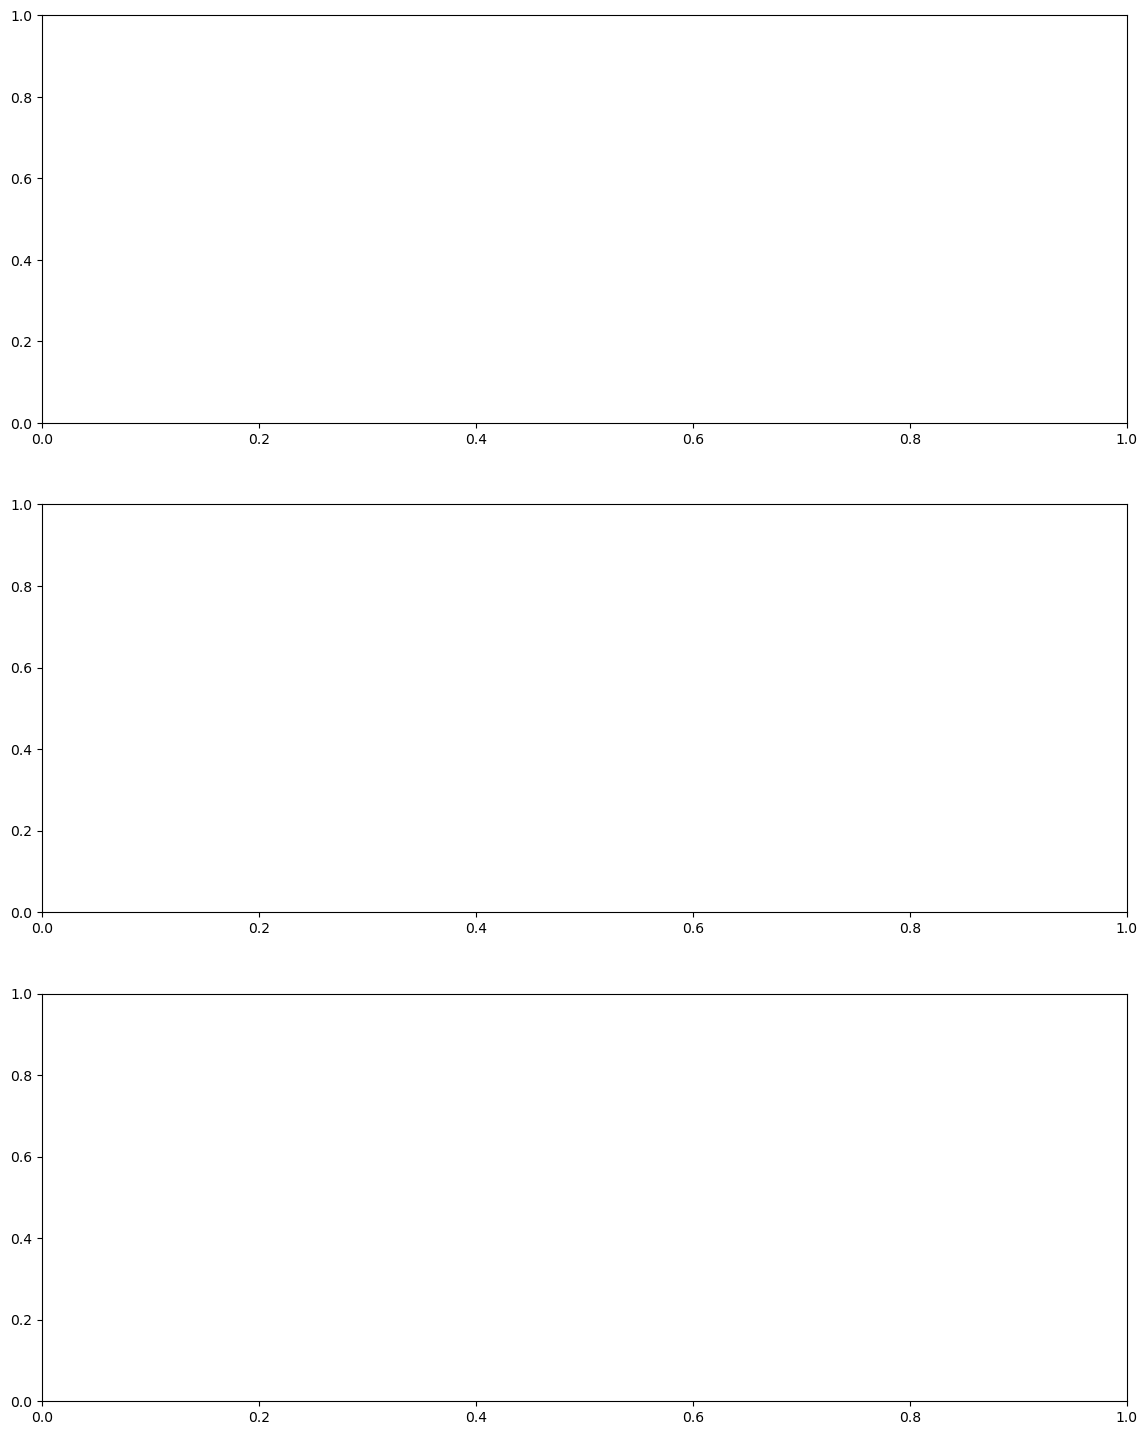

In [5]:
%matplotlib inline

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(14, 18))

for idx, dist, output, ax in zip(range(0, len(distribs)), distribs, outputs, axs):
    Q1, median, Q3 = np.quantile([output[0][i] for i in range(len(output[0]))], [0.25, 0.5, 0.75])
    
    x = dist.ranks

    setXaxisIL(ax, x)
    ax_show = ax.twiny()
    ax_show.plot(x, y= median)
    ax_show.fill_between(x, Q1, Q3, alpha=0.3)
    ax_show.set_xticks([])

    ax.set_xlabel("Native Precipitation Ranks", fontsize=14)
    ax.set_ylabel(f"Normalized age of MCS contributing to global extreme", fontsize=14)
    ax.set_title(f"{sim_names[idx]} MCS of 2h to 10h duration over native rain ranks", fontsize=16)

plt.tight_layout()
plt.savefig(figures_All_path + "Ages_over_bins.png", dpi=300)
plt.show()

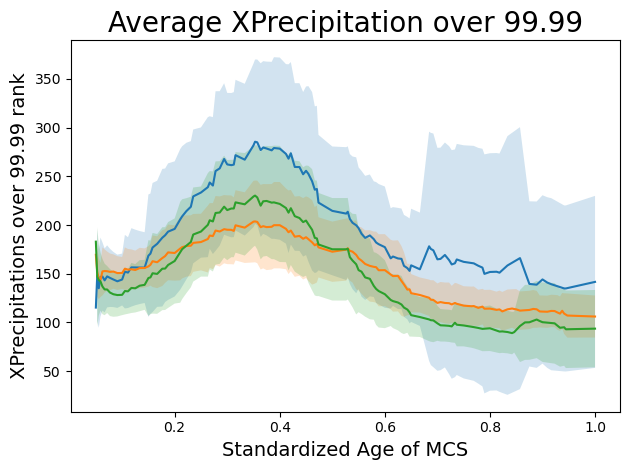

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

for i, output in enumerate(outputs):
    #retrieve data out of output
    Xprecip_over_ages = output[2]
    Ages_of_Xprecip = output[1]
    # Calculate moving average
    window_width = 20  # Change this value to adjust the width of the moving average
    rolling_average = pd.Series(Xprecip_over_ages).rolling(window=window_width, min_periods=1).mean()
    rolling_std = pd.Series(Xprecip_over_ages).rolling(window=window_width, min_periods=1).std()
    # Plot the moving average
    plt.plot(Ages_of_Xprecip, rolling_average, label = sim_names[i])
    plt.fill_between(Ages_of_Xprecip, rolling_average - rolling_std, rolling_average + rolling_std, alpha=0.2)
plt.xlabel('Standardized Age of MCS', fontsize=14)
plt.ylabel('XPrecipitations over 99.99 rank', fontsize=14)
plt.title('Average XPrecipitation over 99.99', fontsize=20)
plt.tight_layout()
plt.savefig(figures_All_path + "Xprecip_over_ages_width20.png", dpi = 300)
plt.show()
